# Conversion Methods
For converting data types mainly

In [2]:
import sys
import os

import pandas as pd
import numpy as np
import pyarrow as pa
sys.path.append(os.path.abspath(".."))

from extras.utils import load_vehicle_data

## Loading Data

In [3]:
df = load_vehicle_data()
# Generating Series
city_mpg = df.city08
highway_mpg = df.highway08

## Type Conversions

In [4]:
city_mpg.astype("int16[pyarrow]")

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int16[pyarrow]

This won't work for int8 as there are values bigger than 127

In [5]:
city_mpg.astype("int8[pyarrow]")

ArrowInvalid: Integer value 132 not in range: -128 to 127

But, using a narrower type helps with memory usage. To check limits on integer and float types, numpy is used

In [6]:
np.iinfo("int64")

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [8]:
np.iinfo("uint8")

iinfo(min=0, max=255, dtype=uint8)

In [9]:
np.finfo("float32")

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

## Memory Usage

In [10]:
city_mpg.nbytes

329152

In [12]:
city_mpg.astype("Int16").nbytes

123432

Using .nbytes with object types only shows the memory that the object is taking. Let's inspect the make of the cars. First using Pandas 2, which accepts nbytes for a string, and then with an object type.

In [13]:
make = df.make

In [17]:
make.dtype

string[pyarrow]

In [14]:
make.nbytes

425635

In [15]:
make.memory_usage()

425763

In [16]:
make.memory_usage(deep=True)

425763

In [19]:
# Converting to Pandas 1, and showing without deep=True
make.astype(str).memory_usage()

329280

In [20]:
# This shows the actual usage by object types
make.astype(str).memory_usage(deep=True)

2606395

## String and Category Types

A memory saving strategy is to use categories (when possible) as it stores values in a dictionary and uses integers to reference it

In [22]:
(
    make
    .astype("category")
    .memory_usage(deep=True)
)

88697

This saves around 5x from the pyarrow string! Besides, the .str accessor can still be used, as well as the .cat.

This can also be done to numeric categories (like Shoe size), but with the downside of not being able to do math on the values.

In [23]:
(
    city_mpg
    .astype("category")
    .cat
    .as_ordered()
)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: category
Categories (105, int64[pyarrow]): [6 < 7 < 8 < 9 ... 137 < 138 < 140 < 150]

## Ordered Categories
Useful for data with natural order (shoe sizes)

In [24]:
values = pd.Series(sorted(set(city_mpg)))

In [25]:
city_type = pd.CategoricalDtype(
    categories=values,
    ordered=True
)

In [26]:
city_mpg.astype(city_type)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: category
Categories (105, int64): [6 < 7 < 8 < 9 ... 137 < 138 < 140 < 150]

In [27]:
# Another way of doing this is with the .cat accessor
city_mpg.astype("category").cat.as_ordered()


0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: category
Categories (105, int64[pyarrow]): [6 < 7 < 8 < 9 ... 137 < 138 < 140 < 150]

It must be noted that there is a pyarrow category type, dictionary, but it is not recommended by the author as it's not easily accessed and it doesn't have the .cat accesor. That being said, if a numeric column is converted to category and exported to a feather file, it will be converted to a pyarrow dictionary type.

Below is a list of types that can be passed to .astype

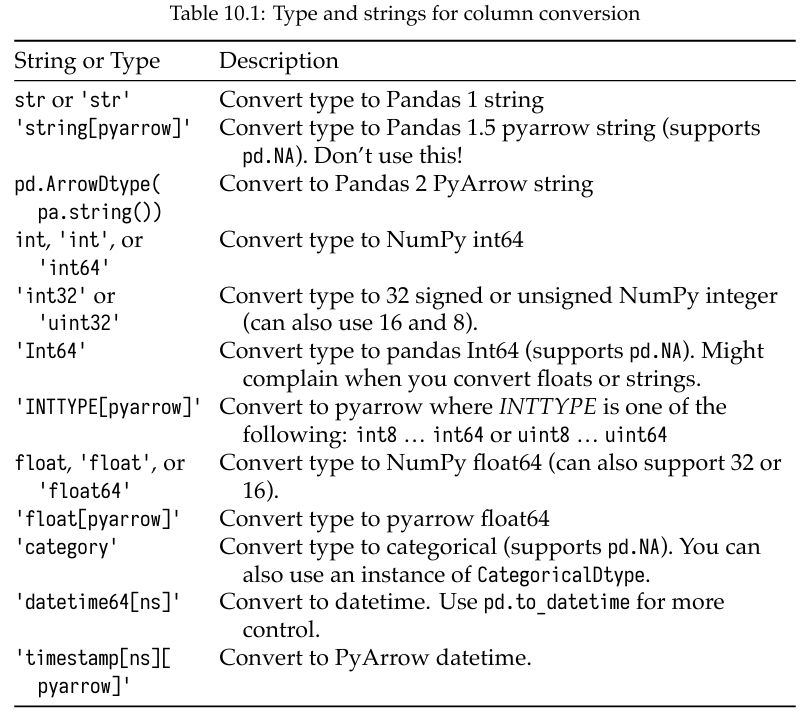

## Converting to Other Types

The .to_numpy method (or .values) gives a NumPy array of values, while the .to_list returns a Python list of values. Both can be used to convert a Series, however the author recommends to not use unless strictly necessary as there might be some drawbacks and pandas data types are more user-friendly and Python lists specifically will slow the code down. On the other hand, a Series can be transformed into a dataframe with the .to_frame method.

In [32]:
city_mpg.values

<ArrowExtensionArray>
[19,  9, 23, 10, 17, 21, 22, 23, 23, 23,
 ...
 18, 23, 21, 24, 21, 19, 20, 18, 18, 16]
Length: 41144, dtype: int64[pyarrow]

In [29]:
city_mpg.to_numpy()

array([19,  9, 23, ..., 18, 18, 16])

In [30]:
city_mpg.to_list()

[19,
 9,
 23,
 10,
 17,
 21,
 22,
 23,
 23,
 23,
 23,
 18,
 21,
 18,
 12,
 20,
 18,
 19,
 17,
 17,
 14,
 14,
 11,
 21,
 17,
 11,
 18,
 17,
 17,
 17,
 17,
 15,
 15,
 15,
 15,
 18,
 11,
 17,
 17,
 15,
 15,
 18,
 13,
 13,
 17,
 17,
 18,
 9,
 18,
 18,
 18,
 19,
 21,
 22,
 18,
 18,
 18,
 16,
 10,
 17,
 17,
 15,
 15,
 15,
 18,
 18,
 16,
 15,
 14,
 10,
 16,
 17,
 15,
 18,
 17,
 21,
 23,
 17,
 18,
 17,
 9,
 21,
 17,
 18,
 17,
 17,
 15,
 15,
 17,
 19,
 21,
 12,
 22,
 18,
 18,
 17,
 17,
 15,
 15,
 9,
 10,
 9,
 13,
 18,
 19,
 16,
 16,
 18,
 18,
 15,
 17,
 18,
 18,
 18,
 15,
 17,
 17,
 15,
 17,
 15,
 17,
 15,
 15,
 15,
 16,
 11,
 15,
 15,
 18,
 16,
 18,
 17,
 18,
 16,
 18,
 16,
 10,
 16,
 15,
 16,
 16,
 18,
 14,
 13,
 12,
 17,
 17,
 14,
 15,
 15,
 17,
 9,
 15,
 16,
 17,
 17,
 16,
 16,
 15,
 21,
 18,
 13,
 22,
 25,
 18,
 20,
 22,
 25,
 22,
 14,
 21,
 24,
 21,
 19,
 20,
 18,
 18,
 16,
 21,
 22,
 11,
 23,
 23,
 18,
 17,
 18,
 18,
 21,
 19,
 21,
 17,
 12,
 18,
 17,
 19,
 18,
 17,
 18,
 17,
 17,
 18,
 

In [33]:
city_mpg.to_frame()

,city08
0,19
1,9
2,23
3,10
4,17
...,...
41139,19
41140,20
41141,18
41142,18


Last but not least, datetimes can be converted using the to_datetime, but this will be discussed in the sections related to dates.

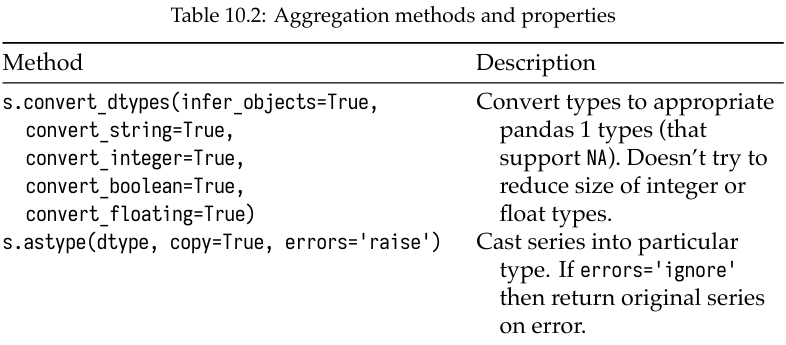
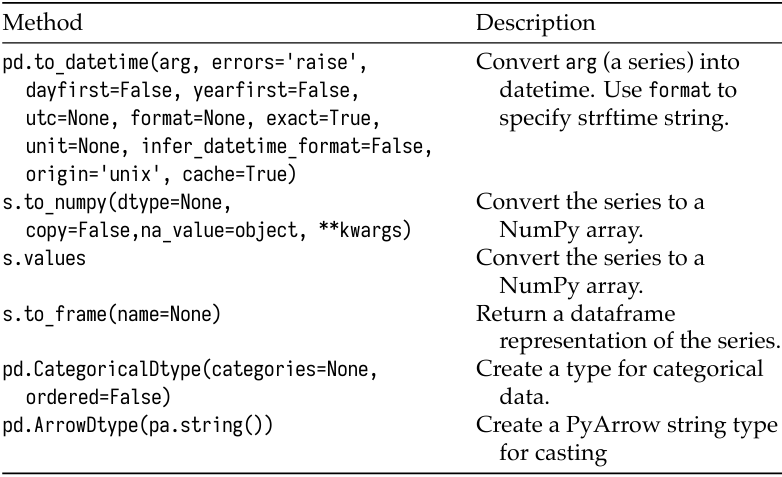

## Excercises

1. Convert a numeric column to a smaller type

In [41]:
highway_mpg

0        25
1        14
2        33
3        12
4        23
         ..
41139    26
41140    28
41141    24
41142    24
41143    21
Name: highway08, Length: 41144, dtype: int64[pyarrow]

In [42]:
highway_mpg.astype("int16")

0        25
1        14
2        33
3        12
4        23
         ..
41139    26
41140    28
41141    24
41142    24
41143    21
Name: highway08, Length: 41144, dtype: int16

2. Calculate the memory savings by converting to smaller numeric types.

In [44]:
print(highway_mpg.nbytes - highway_mpg.astype("int16").nbytes, "bytes saved!")

246864 bytes saved!


3. What is the proper type to cast into String types?

str or "str

 4. Convert a string column into a categorical type.

In [56]:
make.astype("category")

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: category
Categories (136, string[pyarrow]): [AM General, ASC Incorporated, Acura, Alfa Romeo, ..., Volvo, Wallace Environmental, Yugo, smart]

5. Calculate the memory savings (or losses) by converting to a categorical
 type

In [58]:
print(make.memory_usage() - make.astype("category").memory_usage(), "bytes saved!")

337066 bytes saved!
